In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud 
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download(['stopwords',
              'punkt',
              'wordnet',
              'omw-1.4',
              'vader_lexicon'
              ])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
## importing the dataset 

df = pd.read_csv('tourist_accommodation_reviews.csv', encoding =('ISO-8859-1'), low_memory = False)


In [3]:
df.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [4]:
df.shape

(53644, 5)

In [5]:
df.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [6]:
df['Hotel/Restaurant name'].value_counts()

Da Mario                                             279
Sabai Sabai                                          200
No.6 Restaurant                                      200
The Pizza Company                                    198
The Family Restaurant                                196
                                                    ... 
Sultan's Grill Authentic Turkish & Indian Cuisine     91
Som Restaurant                                        91
Chez Nicolas                                          90
Dada Yura Restaurant                                  80
Chekhoff Restaurant and Bar                           30
Name: Hotel/Restaurant name, Length: 537, dtype: int64

In [7]:
# to select 30 hotels from the dataset

df = df.loc[(df['Hotel/Restaurant name'] == 'Thong Dee The Kathu Brasserie') | (df['Hotel/Restaurant name'] == 'The Family Restaurant')| (df['Hotel/Restaurant name'] == 'The Tavern') | (df['Hotel/Restaurant name'] == 'Chekhoff Restaurant and Bar') | (df['Hotel/Restaurant name'] == 'Climax on Bangla')
      | (df['Hotel/Restaurant name'] == 'The Cook') | (df['Hotel/Restaurant name'] == 'Dada Yura Restaurant') | (df['Hotel/Restaurant name'] == 'Shameena Restaurant and Lounge') | (df['Hotel/Restaurant name'] == 'Outdoor Restaurant') | (df['Hotel/Restaurant name'] == 'Pizzeria Hut 1')
      | (df['Hotel/Restaurant name'] == 'Som Restaurant') | (df['Hotel/Restaurant name'] == 'La Capannina da Mario') | (df['Hotel/Restaurant name'] == 'Red Chopsticks At Patong') | (df['Hotel/Restaurant name'] == 'The Pizza Company') | (df['Hotel/Restaurant name'] == 'Da Maurizio Beach Side')
      | (df['Hotel/Restaurant name'] == 'Chez Nicolas') | (df['Hotel/Restaurant name'] == 'Tokyo Japanese Restaurant') | (df['Hotel/Restaurant name'] == '+39 Italian Street Food') | (df['Hotel/Restaurant name'] == 'No.6 Restaurant') | (df['Hotel/Restaurant name'] == "Joe's Downstairs")
      | (df['Hotel/Restaurant name'] == 'Dada Yura Restaurant') | (df['Hotel/Restaurant name'] == 'Restaurant Georgia') | (df['Hotel/Restaurant name'] == 'Kazu Patong Phuket') | (df['Hotel/Restaurant name'] == 'Sabai Sabai ') | (df['Hotel/Restaurant name'] == 'Thong Dee The Kathu Brasserie')
      | (df['Hotel/Restaurant name'] == 'The Drunken Leprechaun') | (df['Hotel/Restaurant name'] == 'Rum Jungle') | (df['Hotel/Restaurant name'] == "Don's Bar B Q") | (df['Hotel/Restaurant name'] == 'Da Mario')| (df['Hotel/Restaurant name'] == 'Mor Mu Dong') | (df['Hotel/Restaurant name'] == 'Baia Del Sole')
      | (df['Hotel/Restaurant name'] == 'Ristorante Pizzeria Zafferano') | (df['Hotel/Restaurant name'] == 'Trattoria pizzeria Cosa Nostra Delivery')]

In [8]:
df.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [9]:
df.shape

(3358, 5)

In [10]:
#to print the length of the hotel

len(df['Hotel/Restaurant name'].unique())

30

In [11]:
df.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3358,3358,3358,3358,3358
unique,2578,1215,9,30,2577
top,rn364836775,Reviewed 3 weeks ago,Patong,Da Mario,Really bad quality of food taste is very bad. ...
freq,10,46,1636,279,10


## i will use the RegexpTokenizer from NLTK to perform tokenization. This converts our character string into tokens by splitting it into words. In addition,this allows us to define a regular expression, and we can therefore define a regular expression so that we only tokenize alphanumeric characters.

## Stemming is the process of reducing variants of a word to a root form. Porter’s Stemmer is a popular stemming algorithm which performs well compared to other stemming algorithms but has the disadvantage that it doesn’t always produce real words. so we will use porter stemmer () to reduce the variants of the word to root form

In [12]:
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) # Tokenize
    
    #to remove stopwords using list comprehension
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    
    # we will use PorterStemmer() to reduce the variants of the word to root form
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

## NLTK  provides a corpus of stopwords which we can use to remove stopwords from  tokenized text

In [13]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## The SentimentIntensityAnalyzer within NLTK outputs a dictionary with a negative score, a neutral score and a positive score. These sum to 1. The compound score is an overall rating between -1 and 1, with negative numbers suggesting negative sentiment and positive numbers positive sentiment. The closer to 1 or -1, the stronger this sentiment.

In [14]:


#sentiment = SentimentIntensityAnalyzer()


## using the SentimentIntensityAnalyzer instantiated above to generate polarity scores for the reviews in our dataset. To do this,we use list comprehension to create a new columns "compound", "neg", "neu", and "pos" for each from the dictionaries returned when we use the polarity_scores () method

In [15]:
#  Iinstantiating SentimentIntensityAnalyzer()
sentiment = SentimentIntensityAnalyzer()

# extracting values from the dictionary and creating new coulmns within the dataset
df['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df['Review']]
df['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df['Review']]
df['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df['Review']]
df['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df['Review']]

## To check that this has worked as we expected, we can use head() again to inspect the first few rows of our Data Frame. We can see that we have indeed added four newcolumns

In [16]:
df.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,0.0516,0.11,0.772,0.118
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",0.9237,0.00,0.730,0.270
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,0.6808,0.00,0.869,0.131
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,0.8419,0.00,0.823,0.177
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,0.9734,0.00,0.557,0.443


In [17]:
df.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
52555,rn466399193,"Reviewed March 11, 2017",Kata Beach,Dada Yura Restaurant,"Service was terrible , food was very basic and...",-0.7634,0.210,0.735,0.055
52556,rn444296508,"Reviewed December 14, 2016",Kata Beach,Dada Yura Restaurant,Went there for a drink. Interesting place with...,0.9476,0.000,0.654,0.346
52557,rn416019019,"Reviewed September 8, 2016",Kata Beach,Dada Yura Restaurant,Good authentic Russian food and good atmospher...,0.9349,0.000,0.671,0.329
52558,rn383156148,"Reviewed June 16, 2016",Kata Beach,Dada Yura Restaurant,"I like this restaurant. Good foods,delicious f...",0.9377,0.000,0.416,0.584
52559,rn364836775,"Reviewed April 17, 2016",Kata Beach,Dada Yura Restaurant,Really bad quality of food taste is very bad. ...,-0.6789,0.188,0.687,0.125


## We can also use the describe() method to get more of an insight into sentimentscores for the review data.

In [18]:
df[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,3358.000000,3358.000000,3358.000000,3358.000000
mean,0.611107,0.031484,0.747611,0.220926
std,0.455169,0.055604,0.127487,0.134813
min,-0.941600,0.000000,0.298000,0.000000
25%,0.476700,0.000000,0.667000,0.121250
50%,0.821950,0.000000,0.752000,0.212000
75%,0.917700,0.047750,0.835000,0.312750
max,0.990300,0.406000,1.000000,0.698000


## It’s apparent that the scores are primarily positive. In fact, we can see that the mediancompound score is 0.82. which means that over 50% of the reviews have a compoundscore of more than 0.82, which suggests strong positive sentiment

## Lets take a look atthe distribution of the compound scores.

<AxesSubplot:xlabel='compound', ylabel='Count'>

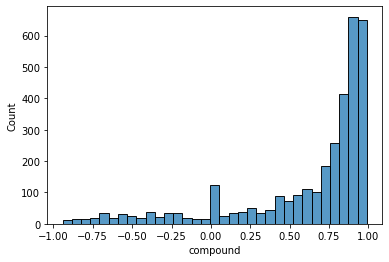

In [19]:
##  distribution of compound reviews

sns.histplot(df['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

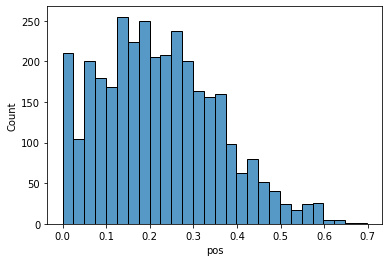

In [20]:
##  distribution positive reviews

sns.histplot(df['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

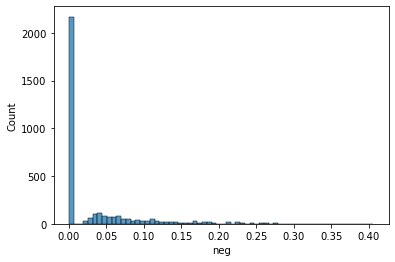

In [21]:
# distribution of negative reviews

sns.histplot(df['neg'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

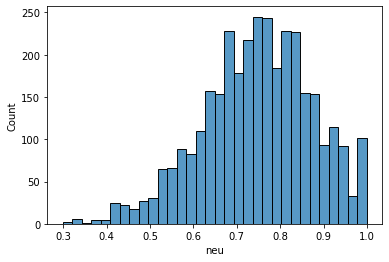

In [22]:
# distribution of negative reviews

sns.histplot(df['neu'])

## If we’re doing sentiment analysis, we’re generally going to be interested in understanding how sentiment varies across different products, brands or businesses. We may also be interested in comparing the proportion of positive or negative reviews across them. In this case we are going to class anything with a compound score of zero or below as negative. Lets have a look at how many negative reviews there are for each of the products in our dataset

In [23]:
## lets look at how many negative reviews we have per hotel

(df['compound'] <= 0).groupby(df['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
+39 Italian Street Food                    16
Baia Del Sole                               9
Chekhoff Restaurant and Bar                 0
Chez Nicolas                               30
Climax on Bangla                            4
Da Mario                                   49
Da Maurizio Beach Side                     11
Dada Yura Restaurant                       40
Don's Bar B Q                              10
Joe's Downstairs                            9
Kazu Patong Phuket                         28
La Capannina da Mario                       7
Mor Mu Dong                                10
No.6 Restaurant                            18
Outdoor Restaurant                         48
Pizzeria Hut 1                             15
Red Chopsticks At Patong                   14
Restaurant Georgia                         15
Ristorante Pizzeria Zafferano              17
Rum Jungle                                  8
Shameena Restaurant and Lounge              3
Som Restaura

## Of course, the number of negative reviews for each product doesn’t tell us   we know how many reviews there are in total for each one. So we should look at the number of negative reviews as a proportion of the total number of review for that product

In [24]:
## calculate as percentage of total reviews

percent_negative = pd.DataFrame((df['compound'] <= 0).groupby(df['Hotel/Restaurant name']).sum()
                               /df['Hotel/Restaurant name'].groupby(df['Hotel/Restaurant name']).count()*100,
                               columns=['% negative reviews']).sort_values(by ='% negative reviews')
percent_negative

,% negative reviews
Hotel/Restaurant name,
Chekhoff Restaurant and Bar,0.000000
Thong Dee The Kathu Brasserie,2.000000
Shameena Restaurant and Lounge,3.296703
Climax on Bangla,4.000000
The Tavern,4.000000
La Capannina da Mario,7.692308
Rum Jungle,8.000000
The Family Restaurant,8.163265
Joe's Downstairs,9.000000


In [25]:
## lets look at how many positive reviews we have per hotel

(df['compound'] > 0).groupby(df['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
+39 Italian Street Food                     75
Baia Del Sole                               83
Chekhoff Restaurant and Bar                 30
Chez Nicolas                                60
Climax on Bangla                            96
Da Mario                                   230
Da Maurizio Beach Side                      89
Dada Yura Restaurant                        40
Don's Bar B Q                               90
Joe's Downstairs                            91
Kazu Patong Phuket                          64
La Capannina da Mario                       84
Mor Mu Dong                                 82
No.6 Restaurant                            182
Outdoor Restaurant                         145
Pizzeria Hut 1                              85
Red Chopsticks At Patong                    77
Restaurant Georgia                          77
Ristorante Pizzeria Zafferano               75
Rum Jungle                                  92
Shameena Restaurant and Lounge        

## Of course, the number of positive reviews for each product doesn’t tell us   we know how many reviews there are in total for each one. So we should look at the number of positive reviews as a proportion of the total number of review for that product

In [26]:
## calculate as percentage of total reviews

percent_positive = pd.DataFrame((df['compound'] > 0).groupby(df['Hotel/Restaurant name']).sum()
                               /df['Hotel/Restaurant name'].groupby(df['Hotel/Restaurant name']).count()*100,
                               columns=['% positive reviews']).sort_values(by ='% positive reviews')
percent_positive

,% positive reviews
Hotel/Restaurant name,
Dada Yura Restaurant,50.000000
Chez Nicolas,66.666667
Kazu Patong Phuket,69.565217
Outdoor Restaurant,75.129534
The Pizza Company,77.272727
Ristorante Pizzeria Zafferano,81.521739
+39 Italian Street Food,82.417582
Da Mario,82.437276
Restaurant Georgia,83.695652


## we can plot this using barplot() in seaborn library

<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

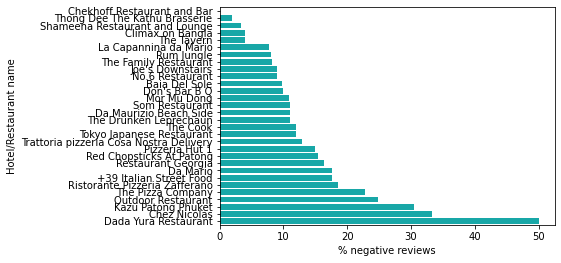

In [27]:
# percentage negative graph

sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

<AxesSubplot:xlabel='% positive reviews', ylabel='Hotel/Restaurant name'>

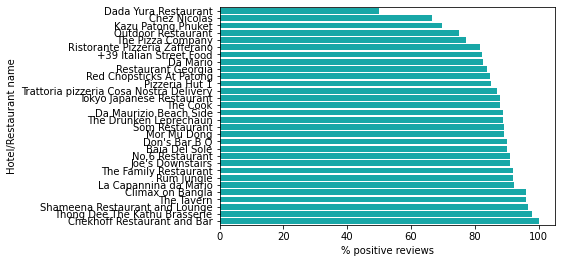

In [28]:
# percentage positive graph
sns.barplot(data=percent_positive, x='% positive reviews', y=percent_positive.index, color='c')

In [29]:
# creating a new column called "processed_review" using apply() and passing the funtion we created above into it as a parameter"

df['processed_review'] = df['Review'].apply(preprocess_text)
df.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,0.0516,0.11,0.772,0.118,"[sunday, roast, lamb, beef, truli, excel, 11ou..."
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",0.9237,0.00,0.730,0.270,"[quietli, set, main, road, nice, atmospher, im..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,0.6808,0.00,0.869,0.131,"[made, reserv, birthday, two, day, advanc, ass..."
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,0.8419,0.00,0.823,0.177,"[visit, regularli, never, fail, impress, quali..."
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,0.9734,0.00,0.557,0.443,"[visit, wonder, place, travel, cannot, complai..."


In [30]:
df_positive_subset = df.loc[(df['Hotel/Restaurant name']=="Don's Bar B Q") & (df['compound'] >0),:]
df_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
30350,rn568537756,"Reviewed March 24, 2018",Patong,Don's Bar B Q,"marinated meat has never quite been my thing, ...",0.9543,0.0,0.710,0.290,"[marin, meat, never, quit, thing, qualiti, pla..."
30351,rn567415521,"Reviewed March 19, 2018",Patong,Don's Bar B Q,We visit as a family group. Staff are friendly...,0.7845,0.0,0.856,0.144,"[visit, famili, group, staff, friendli, dine, ..."
30352,rn567123935,"Reviewed March 17, 2018",Patong,Don's Bar B Q,"First time at Dons, and surely not the last. T...",0.6597,0.0,0.888,0.112,"[first, time, don, sure, last, place, came, me..."
30353,rn560241773,"Reviewed February 13, 2018",Patong,Don's Bar B Q,Ive tried Don BBQ buffet in the weekend days ...,0.7845,0.0,0.717,0.283,"[tri, bbq, buffet, weekend, day, also, standar..."
30355,rn550367090,"Reviewed December 31, 2017",Patong,Don's Bar B Q,We've been to this place again and again. It's...,0.4588,0.0,0.935,0.065,"[we'v, place, favorit, place, eat, bet, can't,..."


In [31]:
df_negative_subset = df.loc[(df['Hotel/Restaurant name']=="Don's Bar B Q") & (df['compound'] <=0),:]
df_negative_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
30349,rn570605833,"Reviewed April 2, 2018",Patong,Don's Bar B Q,My family just got back from Patong last week....,0.0000,0.000,1.000,0.0,"[famili, got, back, patong, last, week, ate, d..."
30354,rn556644804,"Reviewed January 27, 2018",Patong,Don's Bar B Q,"Having been in Patong for 2 weeks, and eaten o...",0.0000,0.000,1.000,0.0,"[patong, 2, week, eaten, mayb, twice, day, pla..."
30360,rn523139988,"Reviewed September 10, 2017",Patong,Don's Bar B Q,Very bad experience with the waitress. There a...,-0.3392,0.054,0.946,0.0,"[bad, experi, waitress, total, 35, pax, us, fi..."
30372,rn460797828,"Reviewed February 17, 2017",Patong,Don's Bar B Q,I visited here for the 250 baht bbq on a Satur...,0.0000,0.000,1.000,0.0,"[visit, 250, baht, bbq, saturday, place, compl..."
30375,rn455400191,"Reviewed January 28, 2017",Patong,Don's Bar B Q,"For only 249 bhat, Don's puts on quite a sprea...",0.0000,0.000,1.000,0.0,"[249, bhat, don', put, quit, spread, come, ear..."


## We first use listcomprehension to create one list of all the words that appear in all of the positive reviews for this product.

In [32]:
# wordcloud of words from positive reviews by product

df_pos_tokens = [word for review in df_positive_subset['processed_review'] for word in review]
df_pos_tokens


['marin',
 'meat',
 'never',
 'quit',
 'thing',
 'qualiti',
 'place',
 'realli',
 'good',
 'price',
 'realli',
 "can't",
 'go',
 'wrong',
 'servic',
 'excel',
 'staff',
 'help',
 'one',
 'blemish',
 'bit',
 'far',
 'beach',
 'visit',
 'famili',
 'group',
 'staff',
 'friendli',
 'dine',
 'friday',
 'night',
 'order',
 'menu',
 'food',
 'excel',
 'cheap',
 'weekend',
 'eat',
 'bbq',
 'situat',
 'nania',
 'road',
 'first',
 'time',
 'don',
 'sure',
 'last',
 'place',
 'came',
 'meat',
 'complet',
 'dish',
 'veget',
 'eat',
 'bbq',
 'buffet',
 'sunday',
 '299',
 'baht',
 'highi',
 'recommend',
 'classic',
 'meat',
 'pork',
 'chop',
 'tri',
 'bbq',
 'buffet',
 'weekend',
 'day',
 'also',
 'standard',
 'menu',
 'conclus',
 'clean',
 'good',
 'price',
 'fresh',
 "we'v",
 'place',
 'favorit',
 'place',
 'eat',
 'bet',
 "can't",
 'eat',
 'lot',
 'food',
 'thai',
 'food',
 'salad',
 'bbq',
 'dessert',
 'fruit',
 'unlik',
 'restaur',
 'limit',
 'realli',
 'enjoy',
 'meal',
 "don'",
 'lot',
 'deli

## We first use list comprehension to create one list of all the words that appear in all of the negative reviews for this product.

In [33]:

df_neg_tokens = [word for review in df_negative_subset['processed_review'] for word in review]
df_neg_tokens

['famili',
 'got',
 'back',
 'patong',
 'last',
 'week',
 'ate',
 "don'",
 'barbq',
 'twice',
 'stay',
 'went',
 'weekend',
 'time',
 'eat',
 '299',
 'baht',
 'requir',
 'take',
 'taxi',
 'tuk',
 'tuk',
 'patong',
 '2',
 'week',
 'eaten',
 'mayb',
 'twice',
 'day',
 'place',
 'stand',
 'place',
 'visit',
 'twice',
 'first',
 'night',
 'got',
 'bone',
 'steak',
 'came',
 'back',
 'second',
 'unlimit',
 'bbq',
 'bad',
 'experi',
 'waitress',
 'total',
 '35',
 'pax',
 'us',
 'fix',
 'tabl',
 '2',
 'long',
 'tabl',
 '2',
 'small',
 'tabl',
 'separ',
 'among',
 'tri',
 'request',
 'nearer',
 'tabl',
 'group',
 'insist',
 'sit',
 'visit',
 '250',
 'baht',
 'bbq',
 'saturday',
 'place',
 'complet',
 'full',
 'queue',
 'meat',
 'everyon',
 'wait',
 '30',
 'mintu',
 'line',
 'got',
 'meat',
 'help',
 'self',
 'side',
 '249',
 'bhat',
 "don'",
 'put',
 'quit',
 'spread',
 'come',
 'earli',
 'line',
 'would',
 'chang',
 'anyth',
 'would',
 'smoke',
 'section',
 'travel',
 'thailand',
 'sever',
 '

## we will use FreqDist() from NLTK library to understand word frequencies. Then we will use the tabulate method to understand the most frequent words,and the number of occurrences of each.

In [34]:
# use nltk FreqDist() and then Tabulate the result for positive reviews

df_pos_freqdist = FreqDist(df_pos_tokens)
df_pos_freqdist.tabulate(8)

  bbq  food   eat great  good place salad  meat 
   69    49    44    37    31    30    29    28 


In [35]:
# use nltk FreqDist() and then Tabulate the result for negative reviews

df_neg_freqdist = FreqDist(df_neg_tokens)
df_neg_freqdist.tabulate(8)

place   got   eat   tuk   bbq  tabl  week twice 
    6     4     4     4     4     4     3     3 


## We can use the plot method to create a frequency distribution plot for the mostfrequent words in the positive reviews 

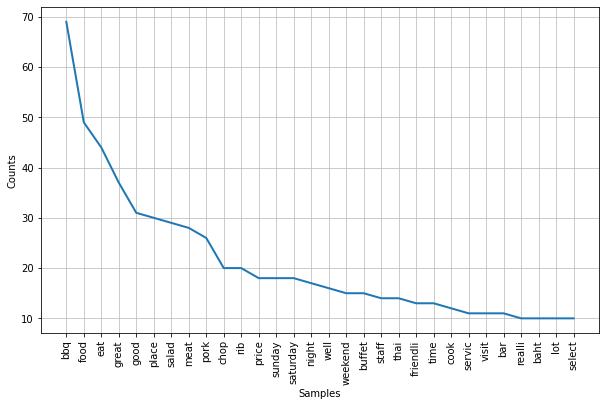

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [36]:
plt.figure(figsize=(10, 6))
df_pos_freqdist.plot(30)

## We can use the plot method to create a frequency distribution plot for the mostfrequent words in the negative reviews 

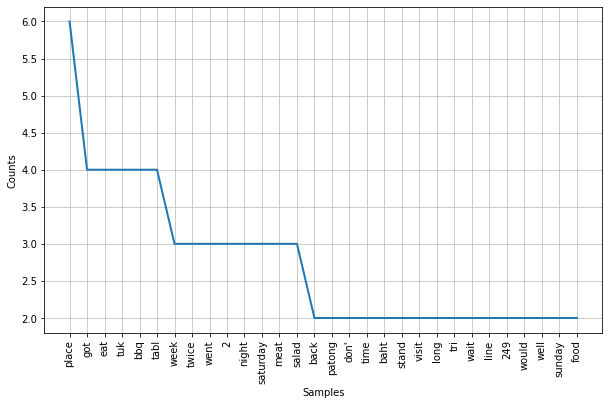

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [37]:
plt.figure(figsize=(10,6))
df_neg_freqdist.plot(30)